In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

C:\Users\hp\AppData\Local\Temp\ipykernel_14540\616101633.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df= pd.read_csv('IESCO_dataset.csv')
df.dropna(inplace=True)
describe = df.describe()
print(describe)


              Hour       DryBulb        DewPnt  target_variable      Humidity
count  13128.00000  13128.000000  13128.000000     13128.000000  13128.000000
mean      12.50000     43.444851     31.902118      1212.993068     69.366469
std        6.92245     19.413433     20.883705       357.145898     17.259005
min        1.00000     -7.000000    -24.000000       430.000000     14.000000
25%        6.75000     29.000000     17.000000       973.000000     58.000000
50%       12.50000     40.000000     30.000000      1125.000000     71.000000
75%       18.25000     58.000000     50.000000      1386.250000     83.000000
max       24.00000     93.000000     75.000000      2713.000000     99.000000


In [3]:
x = df
y = df["target_variable"]
df.shape
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(df)
s2 = MinMaxScaler(feature_range=(0,1))
ys = s2.fit_transform(df[['target_variable']])

In [4]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(ys[i])
X,Y = np.array(X), np.array(Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf    

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=32, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.SimpleRNN(units=32,return_sequences=True),
    tf.keras.layers.SimpleRNN(units=32,return_sequences=True),
    tf.keras.layers.SimpleRNN(units=32,return_sequences=True),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')


288/288 [==============================] - 8s 12ms/step - loss: 0.1314 - val_loss: 0.0550
Epoch 1/200 - Train Loss: 0.1314 - Val Loss: 0.0550
288/288 [==============================] - 3s 9ms/step - loss: 0.0700 - val_loss: 0.0430
Epoch 2/200 - Train Loss: 0.0700 - Val Loss: 0.0430
288/288 [==============================] - 3s 9ms/step - loss: 0.0600 - val_loss: 0.0369
Epoch 3/200 - Train Loss: 0.0600 - Val Loss: 0.0369
288/288 [==============================] - 3s 9ms/step - loss: 0.0526 - val_loss: 0.0350
Epoch 4/200 - Train Loss: 0.0526 - Val Loss: 0.0350
288/288 [==============================] - 3s 9ms/step - loss: 0.0484 - val_loss: 0.0275
Epoch 5/200 - Train Loss: 0.0484 - Val Loss: 0.0275
288/288 [==============================] - 3s 9ms/step - loss: 0.0427 - val_loss: 0.0455
Epoch 6/200 - Train Loss: 0.0427 - Val Loss: 0.0455
288/288 [==============================] - 3s 9ms/step - loss: 0.0412 - val_loss: 0.0236
Epoch 7/200 - Train Loss: 0.0412 - Val Loss: 0.0236
288/288 [==

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


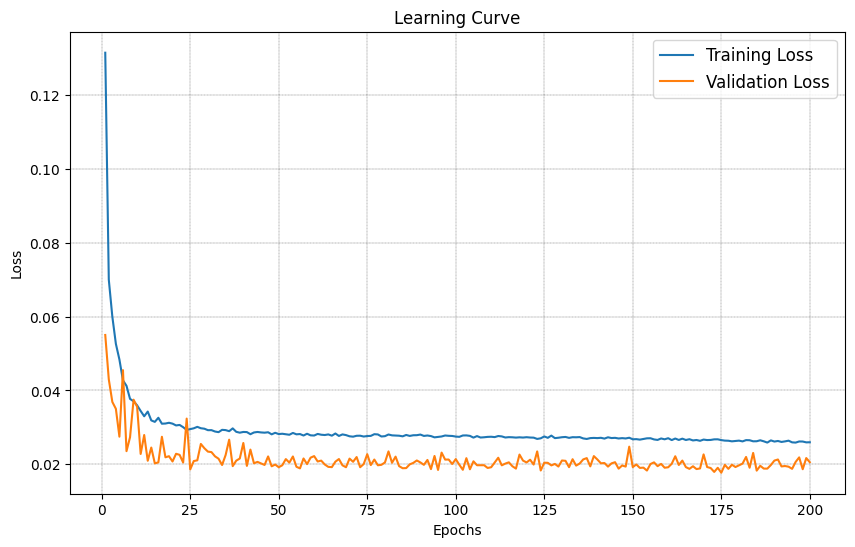

In [8]:
import time

import matplotlib.pyplot as plt

train_losses = []
val_losses = []

start = time.time()
epochs = 200

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), 
                        verbose=1, batch_size=32)
    

    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

end = time.time()
convergence_time = end - start


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.legend(prop={"size":12})
plt.grid(True)
plt.savefig('IESCO_SRNN_learning.eps',bbox_inches='tight')
plt.savefig('IESCO_SRNN_learning.pdf',bbox_inches='tight')
plt.show()

In [9]:
start= time.time()
y_pred= model.predict(X_test)
end= time.time()
inference_time= end-start

124/124 [==============================] - 1s 4ms/step


In [10]:
y_pred = s2.inverse_transform(y_pred)
y_test = s2.inverse_transform(y_test)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [12]:

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae =  mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)
nrmse = (rmse/np.mean(y_pred))*100
print("conergence time is:", convergence_time)
print("inference time is:",inference_time)
print("RMSE: ", rmse)
print("mae", mae)
print("mape", mape)
print("mse",mse)
print("nrmse", nrmse)

conergence time is: 621.7512183189392
inference time is: 1.5125670433044434
RMSE:  67.62622931553918
mae 46.912870663387814
mape 4.710997232934947
mse 4573.30689143789
nrmse 6.373767851232561


In [13]:
y_pred= pd.DataFrame(y_pred)
y_test= pd.DataFrame(y_test)

In [14]:
result_df = pd.concat([y_pred, y_test], axis=1)
result_df.to_csv(r"C:\Users\hp\Desktop\New folder\IESCO\Simple RNN\SRNN_output.csv", index=False)